In [16]:
library(IRdisplay)
library(srvyr)

In [17]:
display_html("<h1><font color=red>ANALISE DE DADOS PNAD 2019</h1>")
display_html("<h2>Relacao entre Renda, Genero, Grau de instrucao e Raca no ano de 2019 <br><br>
    Grupo 2: <br></h2>
    <h3>
    1. Eduardo Pimentel Dantas <br>
    2. Felipe Batista Cavalcante <br>
    3. Márcio Colazingari <br>
    4. Mayssaa Mohamad Khodr <br>
    5. Rafael Luis Giacomin <br>
    6. Ricardo Marques Rosa ")

ANALISE DE DADOS PNAD 2019

Relacao entre Renda, Genero, Grau de instrucao e Raca no ano de 2019 
 Grupo 2: 
 
 1. Eduardo Pimentel Dantas 
 2. Felipe Batista Cavalcante 
 3. Márcio Colazingari 
 4. Mayssaa Mohamad Khodr 
 5. Rafael Luis Giacomin 
 6. Ricardo Marques Rosa

In [18]:
display_html("<h2>Biblioteca PNADcIBGE</h2>")


Biblioteca PNADcIBGE

In [70]:
library(PNADcIBGE)
library(ggplot2)
library(dplyr)
library(psych)
library(BSDA)
library(stats)

In [20]:
### importando dados brutos do Pnad para um Data-Frame, 1 trimestre de 2020
pnad = get_pnadc(year = 2019, design = FALSE, interview = 1)

Warning message in get_pnadc(year = 2019, design = FALSE, interview = 1):
“Deflator year was not provided, so deflator year was set to 2019.”


In [21]:
display_html("<h2>Descricao das colunas/variaveis de interesse :</h2>")
display_html("<h3>UF - Unidade da Federação</h3>")
display_html("<h3>V2007 - Sexo</h3>")
display_html("<h3>V2010 - Cor ou Raca</h3>")
display_html("<h3>VD4019 - Rendimento Mensal Efetivo</h3>")
display_html("<h3>VD3004 -   Nivel Educacional </h3>")
display_html("<h3>VD3005 - Tempo de Estudo </h3>")

Descricao das colunas/variaveis de interesse :

UF - Unidade da Federação

V2007 - Sexo

V2010 - Cor ou Raca

VD4019 - Rendimento Mensal Efetivo

VD3004 - Nivel Educacional

VD3005 - Tempo de Estudo

In [22]:
dadosDF = pnad %>%
select(UF, V2007, V2010,VD4019, VD3004, VD3005)


In [23]:
summary(dadosDF)

              UF            V2007             V2010            VD4019      
 São Paulo     : 34495   Homem :216854   Branca  :170132   Min.   :     4  
 Minas Gerais  : 32733   Mulher:226936   Preta   : 39395   1st Qu.:   998  
 Rio de Janeiro: 31268                   Amarela :  2282   Median :  1200  
 Maranhão      : 30501                   Parda   :229587   Mean   :  2051  
 Santa Catarina: 26536                   Indígena:  2350   3rd Qu.:  2000  
 Paraná        : 23486                   Ignorado:    44   Max.   :300000  
 (Other)       :264771                                     NA's   :260715  
                                      VD3004      
 Fundamental incompleto ou equivalente   :163897  
 Médio completo ou equivalente           : 92623  
 Superior completo                       : 43528  
 Sem instrução e menos de 1 ano de estudo: 37361  
 Fundamental completo ou equivalente     : 33061  
 (Other)                                 : 45004  
 NA's                              

In [24]:
### quantidade de NAs elevada para remuneracao (VD 4019). Desconsiderar as observacoes com NAs

In [25]:
display_html("<h2> Populacao estimada do Brasil</h2>")

Populacao estimada do Brasil

In [62]:
display_html("<h3> # população estimada na PNAD trimestral (2º trimestre de 2019) <br>
população <- pnadc %>% <br>
  mutate(contagem = 1) %>% <br>
  summarise(pop_brasil = survey_total(contagem))<br>
   <h3> Resultado: 209276497 </h3>")

# população estimada na PNAD trimestral (2º trimestre de 2019) 
população <- pnadc %>% 
 mutate(contagem = 1) %>% 
 summarise(pop_brasil = survey_total(contagem)) 
 Resultado: 209276497

In [27]:
display_html("<h2>Tratamento de Dados tais como renomear colunas e remover linhas com NAs</h2>")

Tratamento de Dados tais como renomear colunas e remover linhas com NAs

In [28]:
colnames(dadosDF) = c("UF", "GENERO", "RACA", "RENDIMENTO", "ENSINO", "TEMPO_ESTUDO")

In [29]:
summary(dadosDF)
display_html("<h4>Os dados de rendimento estao com 260.715 NAs</h4>")

              UF            GENERO             RACA          RENDIMENTO    
 São Paulo     : 34495   Homem :216854   Branca  :170132   Min.   :     4  
 Minas Gerais  : 32733   Mulher:226936   Preta   : 39395   1st Qu.:   998  
 Rio de Janeiro: 31268                   Amarela :  2282   Median :  1200  
 Maranhão      : 30501                   Parda   :229587   Mean   :  2051  
 Santa Catarina: 26536                   Indígena:  2350   3rd Qu.:  2000  
 Paraná        : 23486                   Ignorado:    44   Max.   :300000  
 (Other)       :264771                                     NA's   :260715  
                                      ENSINO      
 Fundamental incompleto ou equivalente   :163897  
 Médio completo ou equivalente           : 92623  
 Superior completo                       : 43528  
 Sem instrução e menos de 1 ano de estudo: 37361  
 Fundamental completo ou equivalente     : 33061  
 (Other)                                 : 45004  
 NA's                              

Os dados de rendimento estao com 260.715 NAs

In [30]:
display_html("<h3>Tabela Renomeada</h3>")
head(dadosDF)

Tabela Renomeada

UF,GENERO,RACA,RENDIMENTO,ENSINO,TEMPO_ESTUDO
<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>
Acre,Homem,Preta,100,Fundamental incompleto ou equivalente,5 anos de estudo
Acre,Homem,Branca,NA,Superior incompleto ou equivalente,13 anos de estudo
Acre,Homem,Preta,700,Fundamental completo ou equivalente,9 anos de estudo
Acre,Mulher,Branca,1600,Superior completo,16 anos ou mais de estudo
Acre,Mulher,Parda,NA,Fundamental incompleto ou equivalente,7 anos de estudo
Acre,Mulher,Preta,NA,Fundamental incompleto ou equivalente,5 anos de estudo


In [31]:
display_html("<h3>Estrutura e tipos de dados</h3>")
str(dadosDF)

Estrutura e tipos de dados

tibble [443,790 × 6] (S3: tbl_df/tbl/data.frame)
 $ UF          : Factor w/ 27 levels "Rondônia","Acre",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ GENERO      : Factor w/ 2 levels "Homem","Mulher": 1 1 1 2 2 2 1 1 1 1 ...
 $ RACA        : Factor w/ 6 levels "Branca","Preta",..: 2 1 2 1 4 2 2 4 4 2 ...
 $ RENDIMENTO  : num [1:443790] 100 NA 700 1600 NA NA NA NA 6000 950 ...
 $ ENSINO      : Factor w/ 7 levels "Sem instrução e menos de 1 ano de estudo",..: 2 6 3 7 2 2 2 2 7 7 ...
 $ TEMPO_ESTUDO: Factor w/ 17 levels "Sem instrução e menos de 1 ano de estudo",..: 6 14 10 17 8 6 5 7 17 15 ...


In [32]:
dadosDF_clean = dadosDF %>%
select(UF, GENERO, RACA, RENDIMENTO, ENSINO,TEMPO_ESTUDO )%>%
filter(is.na(RENDIMENTO)==FALSE)

In [33]:
display_html("<h2>Resumo com os dados de renda sem NAs</h2>")
summary(dadosDF_clean)

Resumo com os dados de renda sem NAs

                 UF            GENERO             RACA         RENDIMENTO    
 São Paulo        : 16632   Homem :107768   Branca  :75336   Min.   :     4  
 Minas Gerais     : 14967   Mulher: 75307   Preta   :18110   1st Qu.:   998  
 Rio de Janeiro   : 13662                   Amarela : 1064   Median :  1200  
 Santa Catarina   : 13043                   Parda   :87673   Mean   :  2051  
 Paraná           : 11045                   Indígena:  867   3rd Qu.:  2000  
 Rio Grande do Sul: 11003                   Ignorado:   25   Max.   :300000  
 (Other)          :102723                                                    
                                      ENSINO     
 Sem instrução e menos de 1 ano de estudo: 5566  
 Fundamental incompleto ou equivalente   :48525  
 Fundamental completo ou equivalente     :15292  
 Médio incompleto ou equivalente         :12093  
 Médio completo ou equivalente           :57890  
 Superior incompleto ou equivalente      :10425  
 Superior completo        

In [34]:
head(dadosDF_clean)

UF,GENERO,RACA,RENDIMENTO,ENSINO,TEMPO_ESTUDO
<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>
Acre,Homem,Preta,100,Fundamental incompleto ou equivalente,5 anos de estudo
Acre,Homem,Preta,700,Fundamental completo ou equivalente,9 anos de estudo
Acre,Mulher,Branca,1600,Superior completo,16 anos ou mais de estudo
Acre,Homem,Parda,6000,Superior completo,16 anos ou mais de estudo
Acre,Homem,Preta,950,Superior completo,14 anos de estudo
Acre,Mulher,Branca,200,Médio completo ou equivalente,12 anos de estudo


In [35]:
str(dadosDF_clean)

tibble [183,075 × 6] (S3: tbl_df/tbl/data.frame)
 $ UF          : Factor w/ 27 levels "Rondônia","Acre",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ GENERO      : Factor w/ 2 levels "Homem","Mulher": 1 1 2 1 1 2 1 1 1 2 ...
 $ RACA        : Factor w/ 6 levels "Branca","Preta",..: 2 2 1 4 2 1 4 1 4 4 ...
 $ RENDIMENTO  : num [1:183075] 100 700 1600 6000 950 200 3000 1000 998 4000 ...
 $ ENSINO      : Factor w/ 7 levels "Sem instrução e menos de 1 ano de estudo",..: 2 3 7 7 7 5 7 3 5 5 ...
 $ TEMPO_ESTUDO: Factor w/ 17 levels "Sem instrução e menos de 1 ano de estudo",..: 6 10 17 17 15 13 17 10 13 13 ...


In [36]:
display_html("<h2><font color=red>Informacoes Estatisticas da Distribuicao dos Rendimentos<br>
E informacoes Educacionais</h2>")

Informacoes Estatisticas da Distribuicao dos Rendimentos 
E informacoes Educacionais

In [37]:
display_html("<h3>Mean Rendimento</h3>")
mean(dadosDF_clean$RENDIMENTO)

Mean Rendimento

[1] 2050.988

In [38]:
display_html("<h3>Mediana Rendimento</h3>")
median(dadosDF_clean$RENDIMENTO)

Mediana Rendimento

[1] 1200

In [39]:
display_html("<h3>Variancia Rendimento</h3>")
var(dadosDF_clean$RENDIMENTO)

Variancia Rendimento

[1] 11161263

In [40]:
display_html("<h3>Desvio Padrao Rendimento</h3>")
sd(dadosDF_clean$RENDIMENTO)

Desvio Padrao Rendimento

[1] 3340.848

In [41]:
display_html("<h3>Valor Minimo Rendimento</h3>")
min(dadosDF_clean$RENDIMENTO)

Valor Minimo Rendimento

[1] 4

In [42]:
display_html("<h3>Valor Maximo Rendimento</h3>")
max(dadosDF_clean$RENDIMENTO)

Valor Maximo Rendimento

[1] 3e+05

In [43]:
display_html("<h3>Skewness Rendimento</h3>")
skew(dadosDF_clean$RENDIMENTO)

Skewness Rendimento

[1] 17.43203

In [44]:
display_html("<h3>Kurtosis Rendimento</h3>")
kurtosi(dadosDF_clean$RENDIMENTO)

Kurtosis Rendimento

[1] 908.583

In [45]:
display_html("<h2>Quarters</h2>")
display_html("<h3>25% - 800 </h3>")
display_html("<h3>50% - 1.240 </h3>")
display_html("<h3>75% - 2.100 </h3>")
display_html("<h3>Valor Maximo 300.000 </h3>")

Quarters

25% - 800

50% - 1.240

75% - 2.100

Valor Maximo 300.000

In [46]:
#################

In [47]:
display_html("<h2>Media de remuneracao por grupo Educacional</h2>")
dadosDF_clean %>%
group_by(ENSINO)%>%
summarise(media = mean(RENDIMENTO))

Media de remuneracao por grupo Educacional

`summarise()` ungrouping output (override with `.groups` argument)



ENSINO,media
<fct>,<dbl>
Sem instrução e menos de 1 ano de estudo,815.3904
Fundamental incompleto ou equivalente,1170.5187
Fundamental completo ou equivalente,1442.8601
Médio incompleto ou equivalente,1312.3648
Médio completo ou equivalente,1724.1949
Superior incompleto ou equivalente,2092.2424
Superior completo,4644.4788


In [48]:
display_html("<h2>Media de remuneracao por tempo de estudo</h2>")
dadosDF_clean %>%
group_by(TEMPO_ESTUDO)%>%
summarise(media = mean(RENDIMENTO))

Media de remuneracao por tempo de estudo

`summarise()` ungrouping output (override with `.groups` argument)



TEMPO_ESTUDO,media
<fct>,<dbl>
Sem instrução e menos de 1 ano de estudo,815.3904
1 ano de estudo,861.0711
2 anos de estudo,807.5135
3 anos de estudo,911.3290
4 anos de estudo,1095.8138
5 anos de estudo,1250.4261
6 anos de estudo,1258.5717
7 anos de estudo,1265.7979
8 anos de estudo,1260.8597


In [49]:
display_html("<h2>Media de remuneracao por Genero</h2>")
dadosDF_clean %>%
group_by(GENERO)%>%
summarise(media = mean(RENDIMENTO))

Media de remuneracao por Genero

`summarise()` ungrouping output (override with `.groups` argument)



GENERO,media
<fct>,<dbl>
Homem,2224.172
Mulher,1803.153


In [50]:
display_html("<h2>Media de remuneracao por Raca</h2>")
dadosDF_clean %>%
group_by(RACA)%>%
summarise(media = mean(RENDIMENTO))

Media de remuneracao por Raca

`summarise()` ungrouping output (override with `.groups` argument)



RACA,media
<fct>,<dbl>
Branca,2692.382
Preta,1579.813
Amarela,3108.251
Parda,1588.600
Indígena,1596.693
Ignorado,2885.840


In [51]:
display_html("<h2>Correlacao de Pearson entre nivel educacional e Tempo de Estudo<br>
Corr = 0.436</h2>")
cor(log(dadosDF_clean$RENDIMENTO), log(as.numeric(dadosDF_clean$ENSINO)))

Correlacao de Pearson entre nivel educacional e Tempo de Estudo 
Corr = 0.436

[1] 0.4364827

In [52]:
display_html("<h2><font color=red>REPRESENTACOES GRAFICAS</h2>")
library(repr)

REPRESENTACOES GRAFICAS

Rendimento Geral 2019

Warning message:
“Removed 3281 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


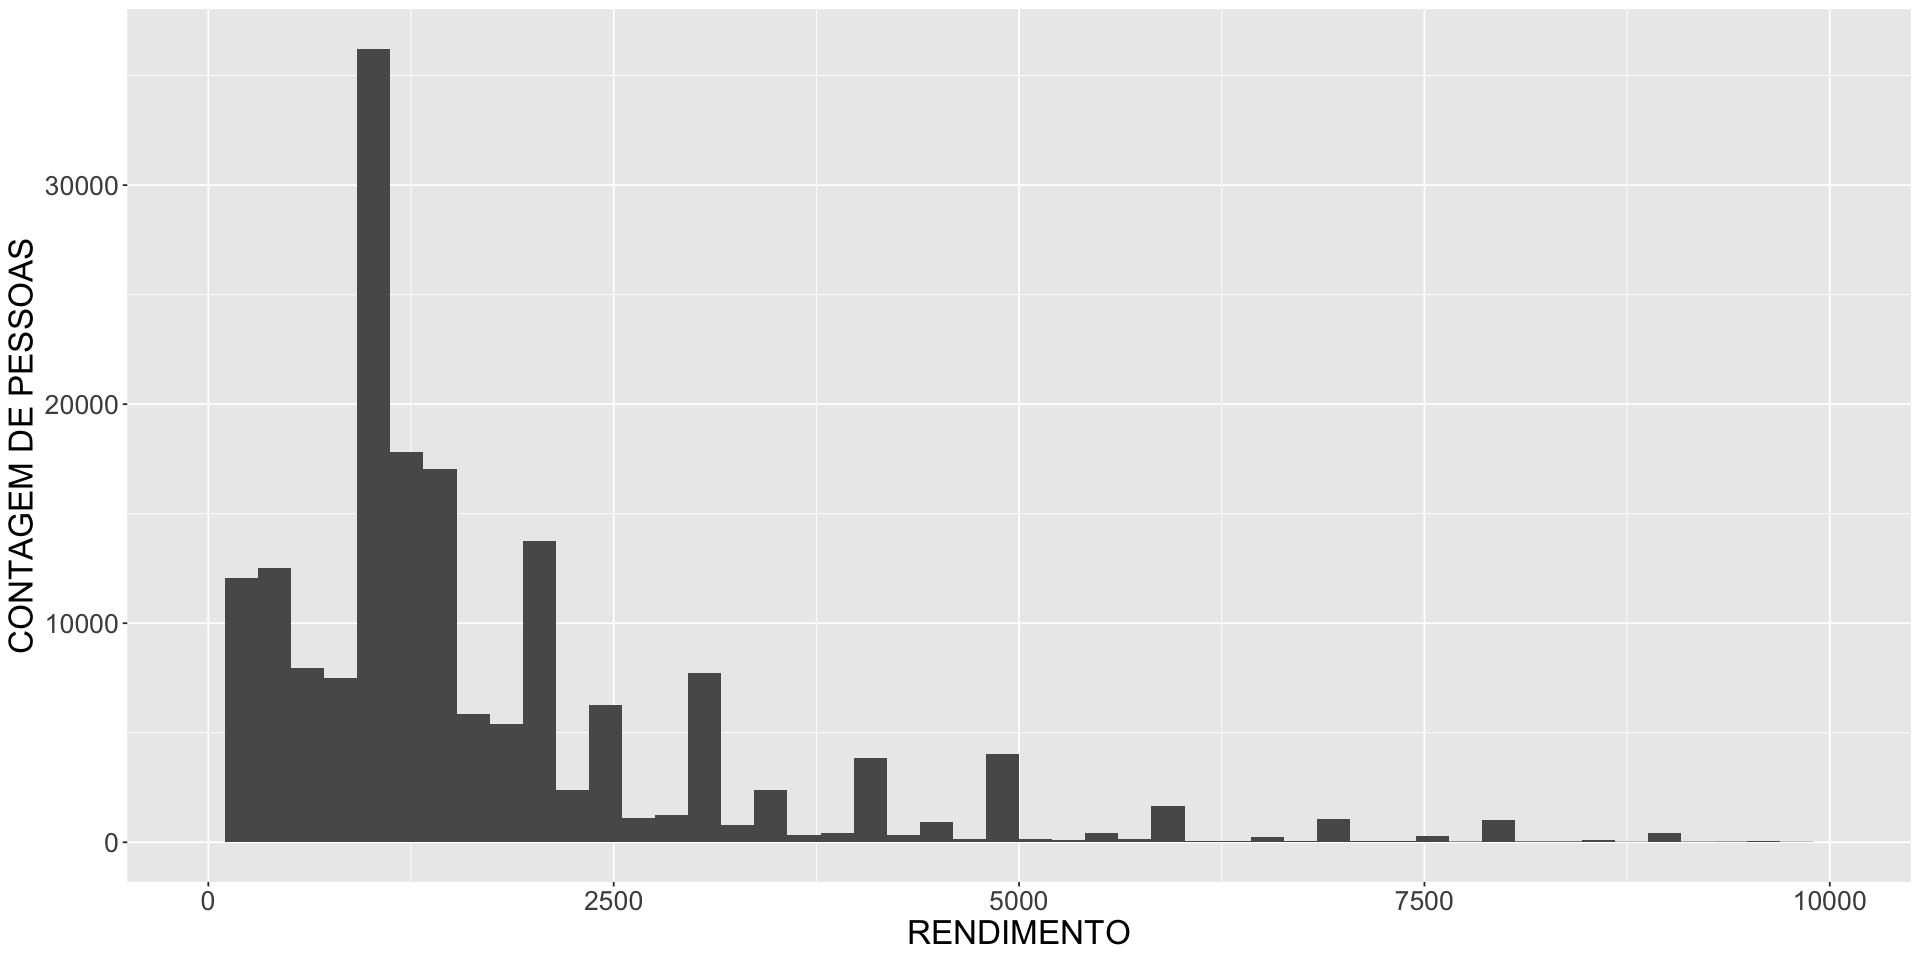

In [53]:
options(repr.plot.width=16, repr.plot.height=8)
display_html("<h3> Rendimento Geral 2019 </h3>")
ggplot(dadosDF_clean)+aes(RENDIMENTO)+geom_histogram(bins=50)+xlim(0,10000)+ylab("CONTAGEM DE PESSOAS") + 
theme(text = element_text(size = 20))

Quantidade de pessoas entrevistadas por Estado

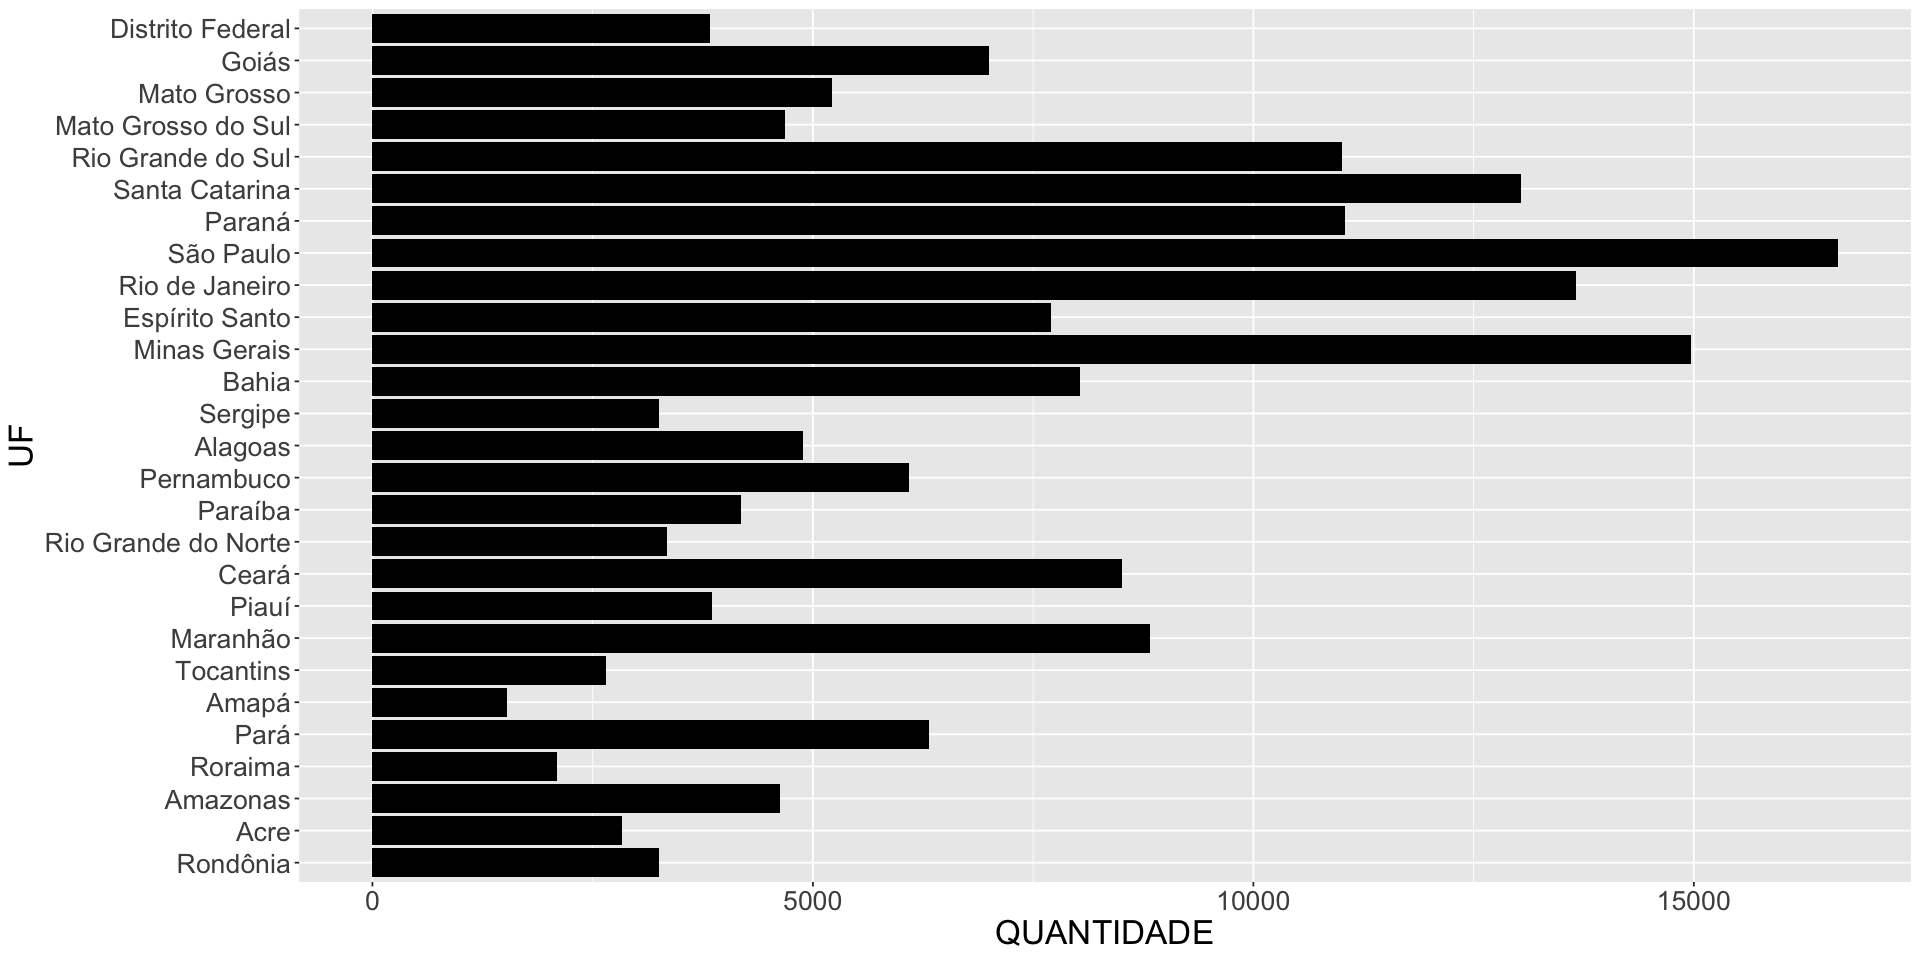

In [54]:
display_html("<h3> Quantidade de pessoas entrevistadas por Estado </h3>")
ggplot(dadosDF_clean)+aes(UF)+geom_bar(fill="black")+ylab("QUANTIDADE") + 
theme(text = element_text(size = 20)) + coord_flip()

Contagem de Pessoas por Genero

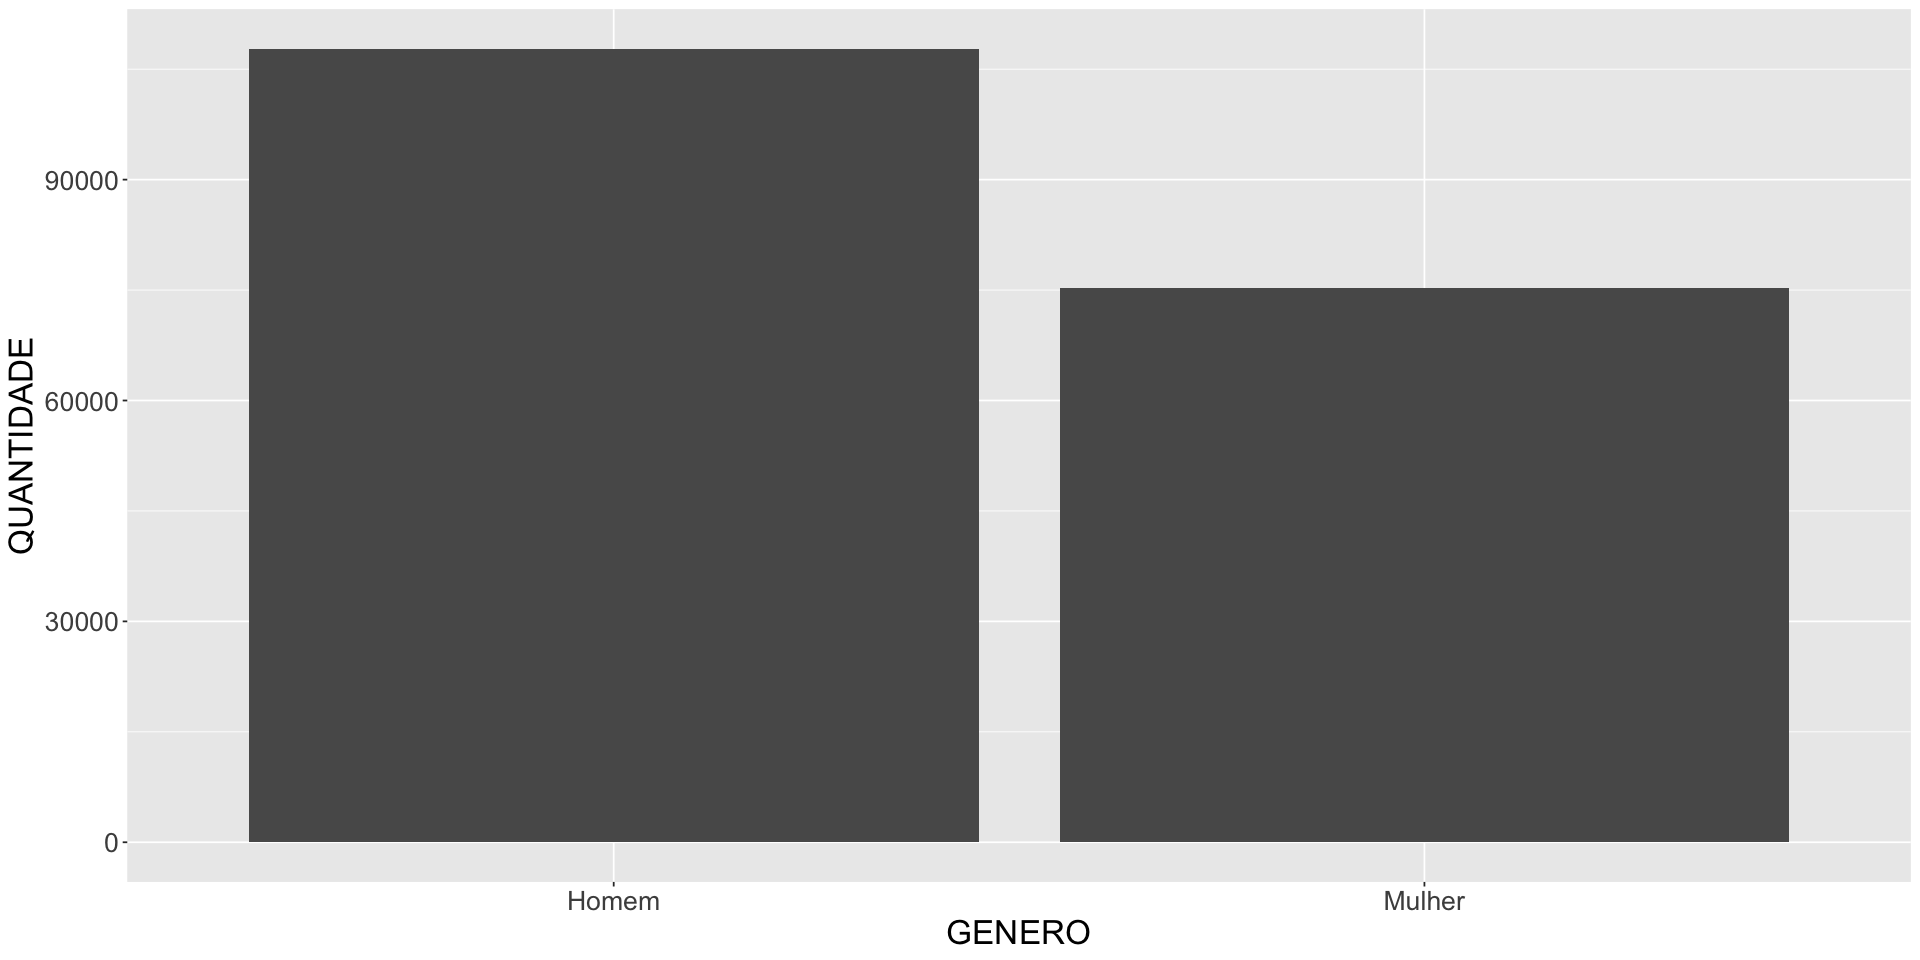

In [55]:
display_html("<h3> Contagem de Pessoas por Genero </h3>")
ggplot(dadosDF_clean)+aes(GENERO)+geom_bar()+ylab("QUANTIDADE") + 
theme(text = element_text(size = 20))

Contagem de Pessoas por Raca

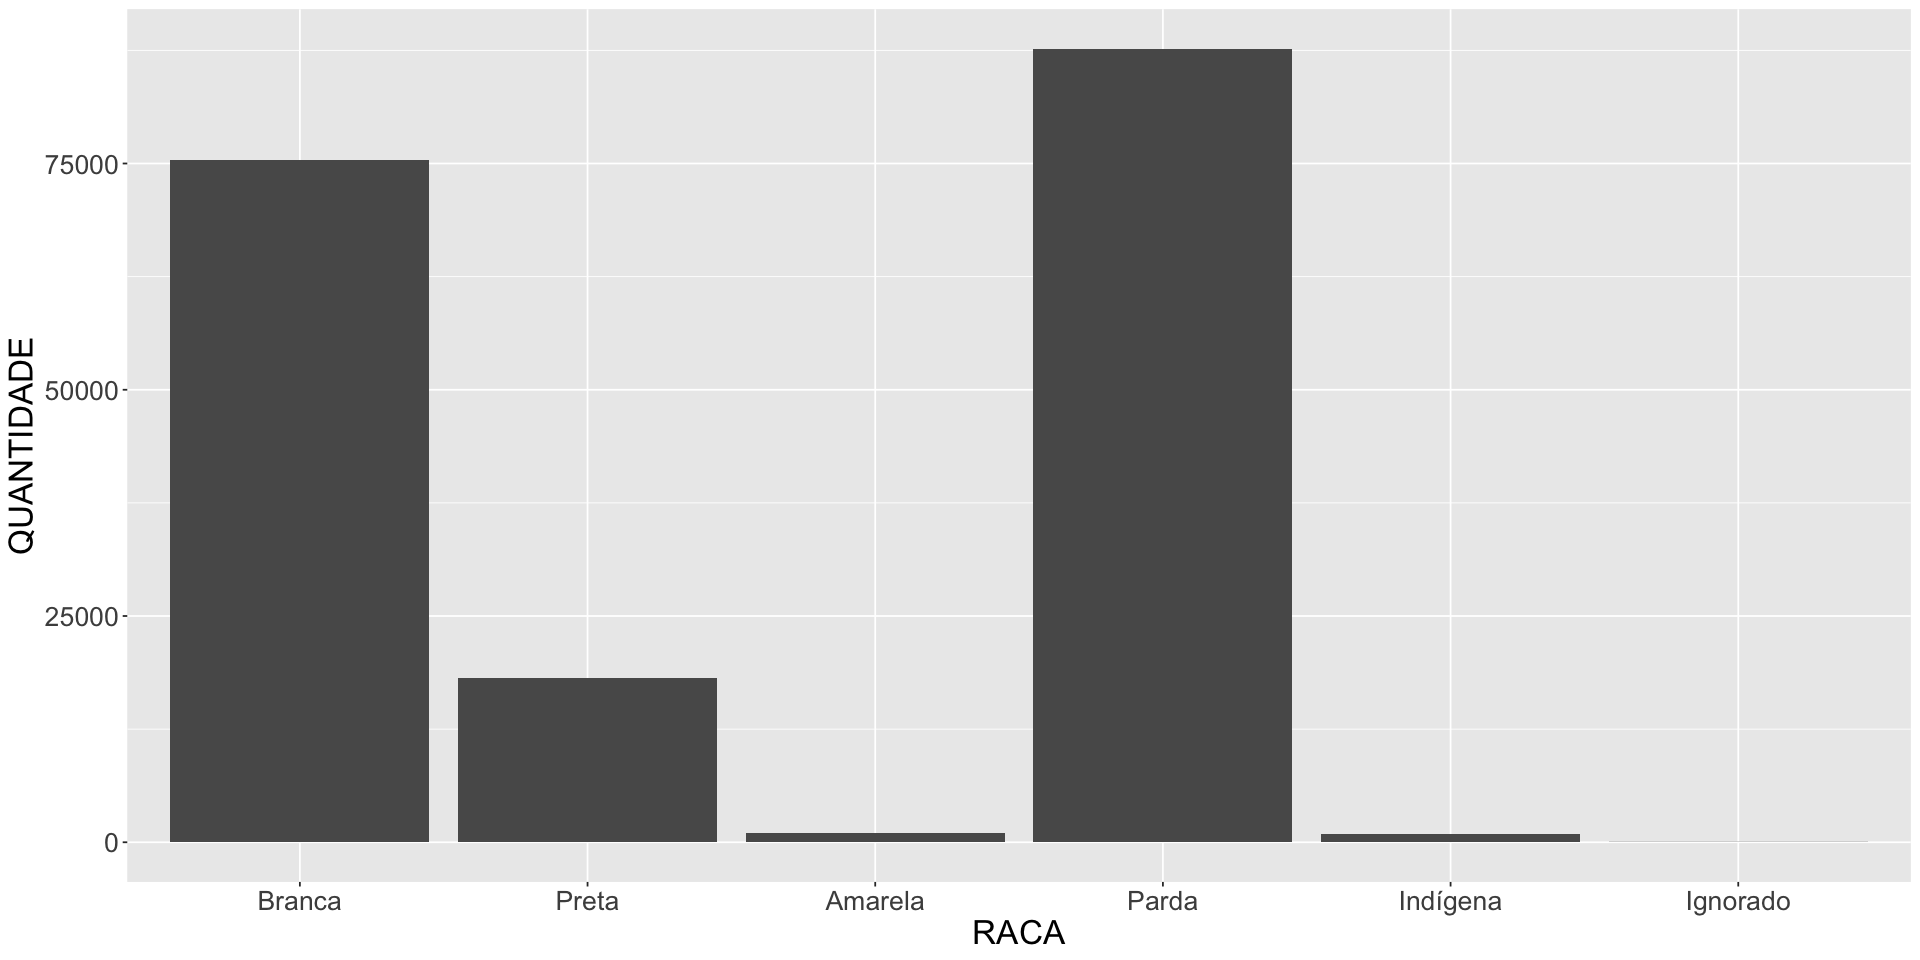

In [56]:
display_html("<h3> Contagem de Pessoas por Raca </h3>")
ggplot(dadosDF_clean)+aes(RACA)+geom_bar()+ylab("QUANTIDADE") + 
theme(text = element_text(size = 20))

Rendimentos por Raca

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



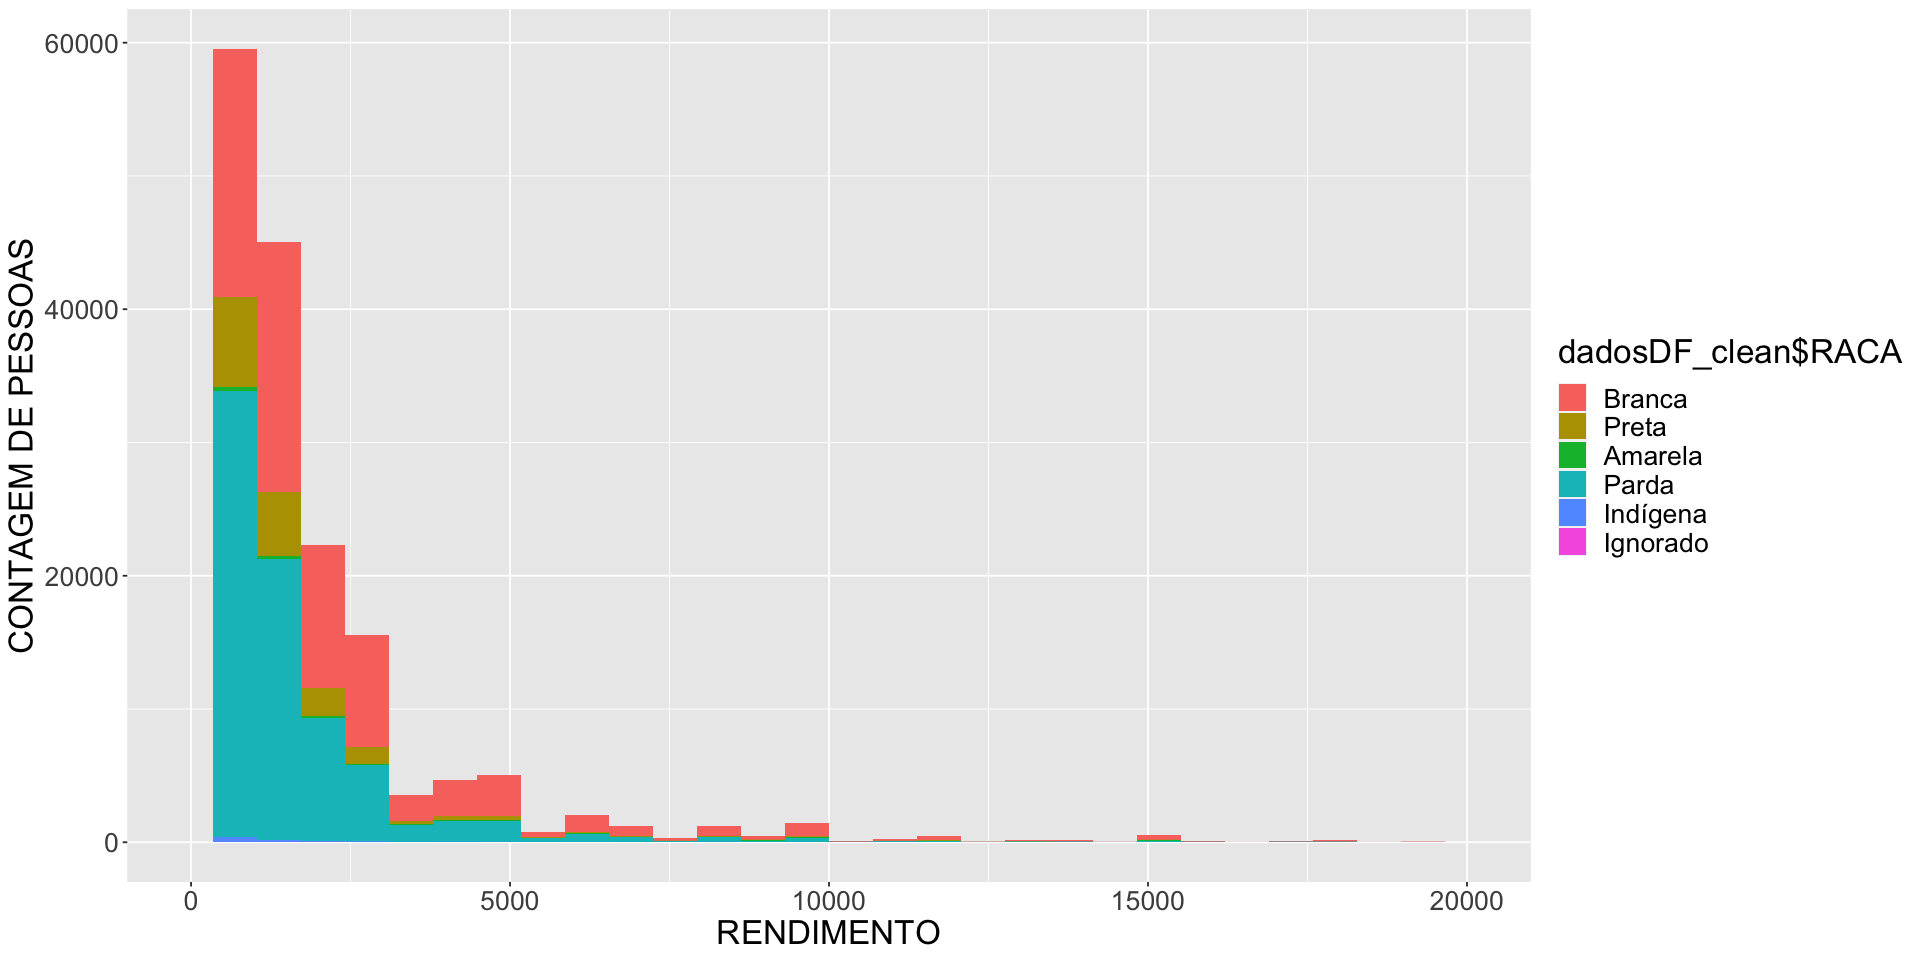

In [57]:
display_html("<h3> Rendimentos por Raca</h3>")
hist = ggplot(dadosDF_clean)+aes(RENDIMENTO)+geom_histogram(aes(fill=dadosDF_clean$RACA))+xlim(0,20000)+ylab("CONTAGEM DE PESSOAS") + 
theme(text = element_text(size = 20))
suppressWarnings(print(hist))

Rendimentos por Genero

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



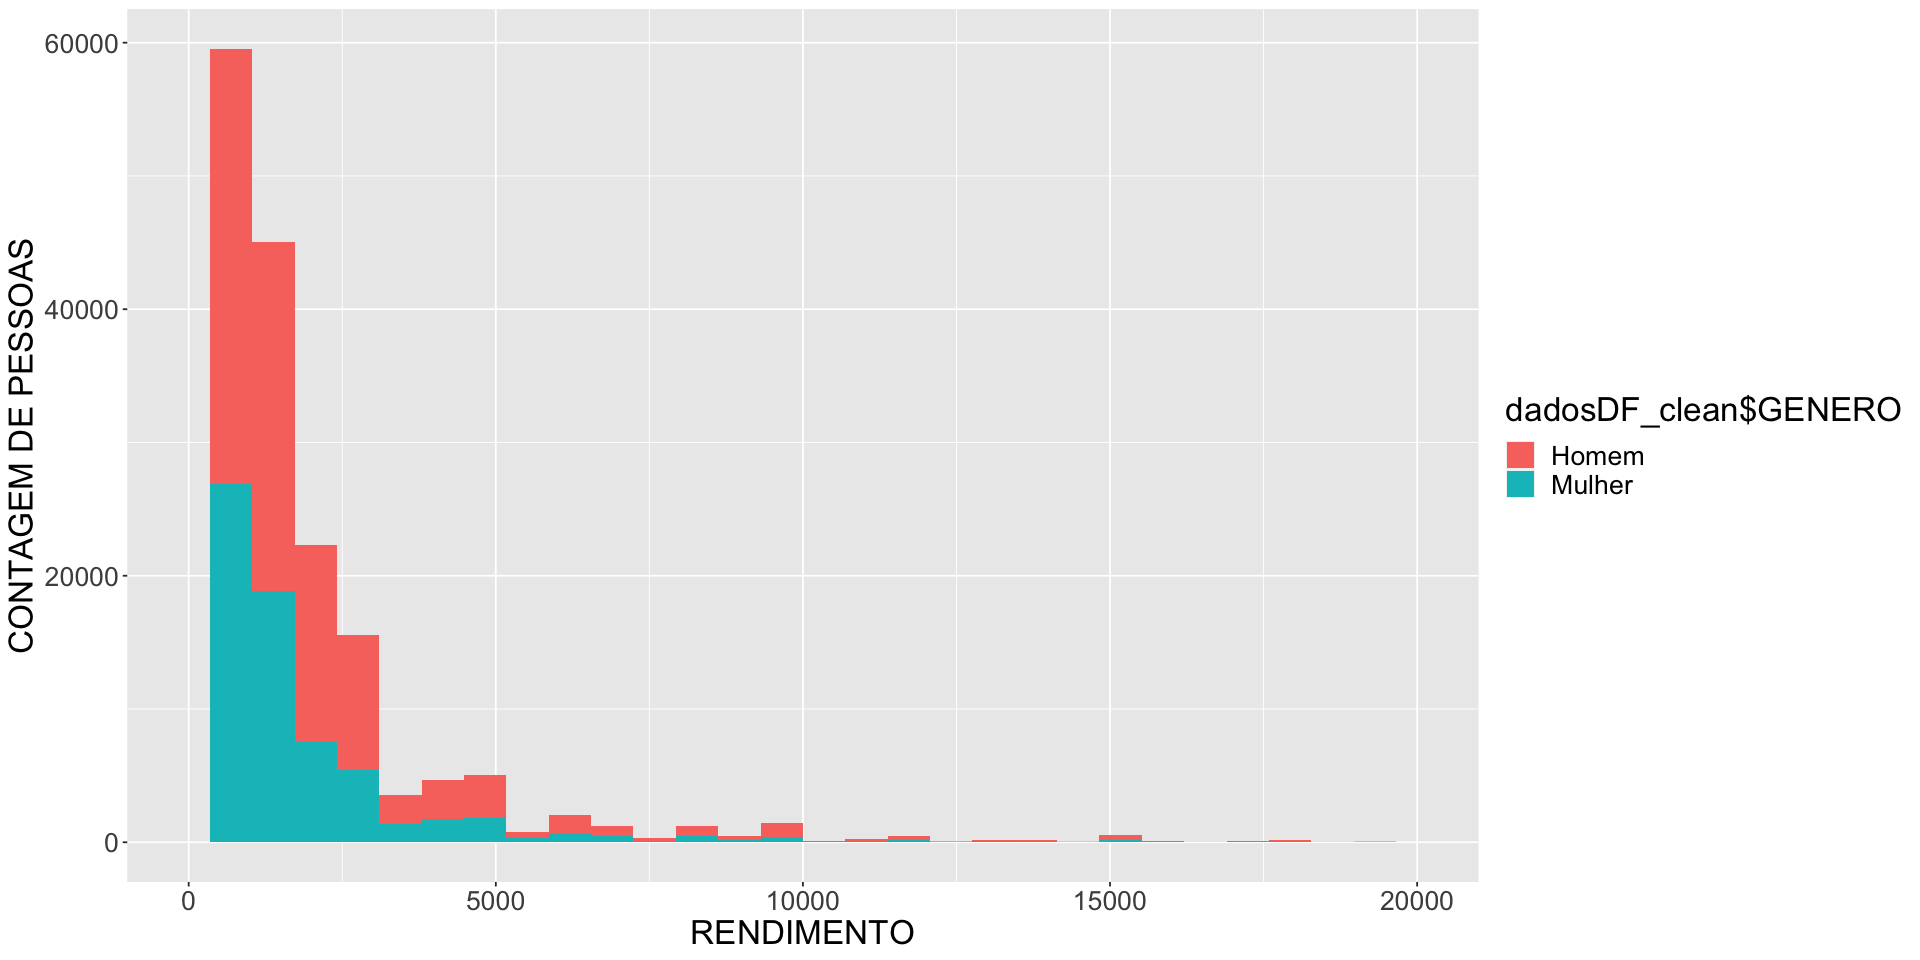

In [58]:
display_html("<h3> Rendimentos por Genero</h3>")
hist = ggplot(dadosDF_clean)+aes(RENDIMENTO)+geom_histogram(aes(fill=dadosDF_clean$GENERO))+xlim(0,20000)+ylab("CONTAGEM DE PESSOAS") + 
theme(text = element_text(size = 20))
suppressWarnings(print(hist))

Rendimentos por Nivel de Escolaridade

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



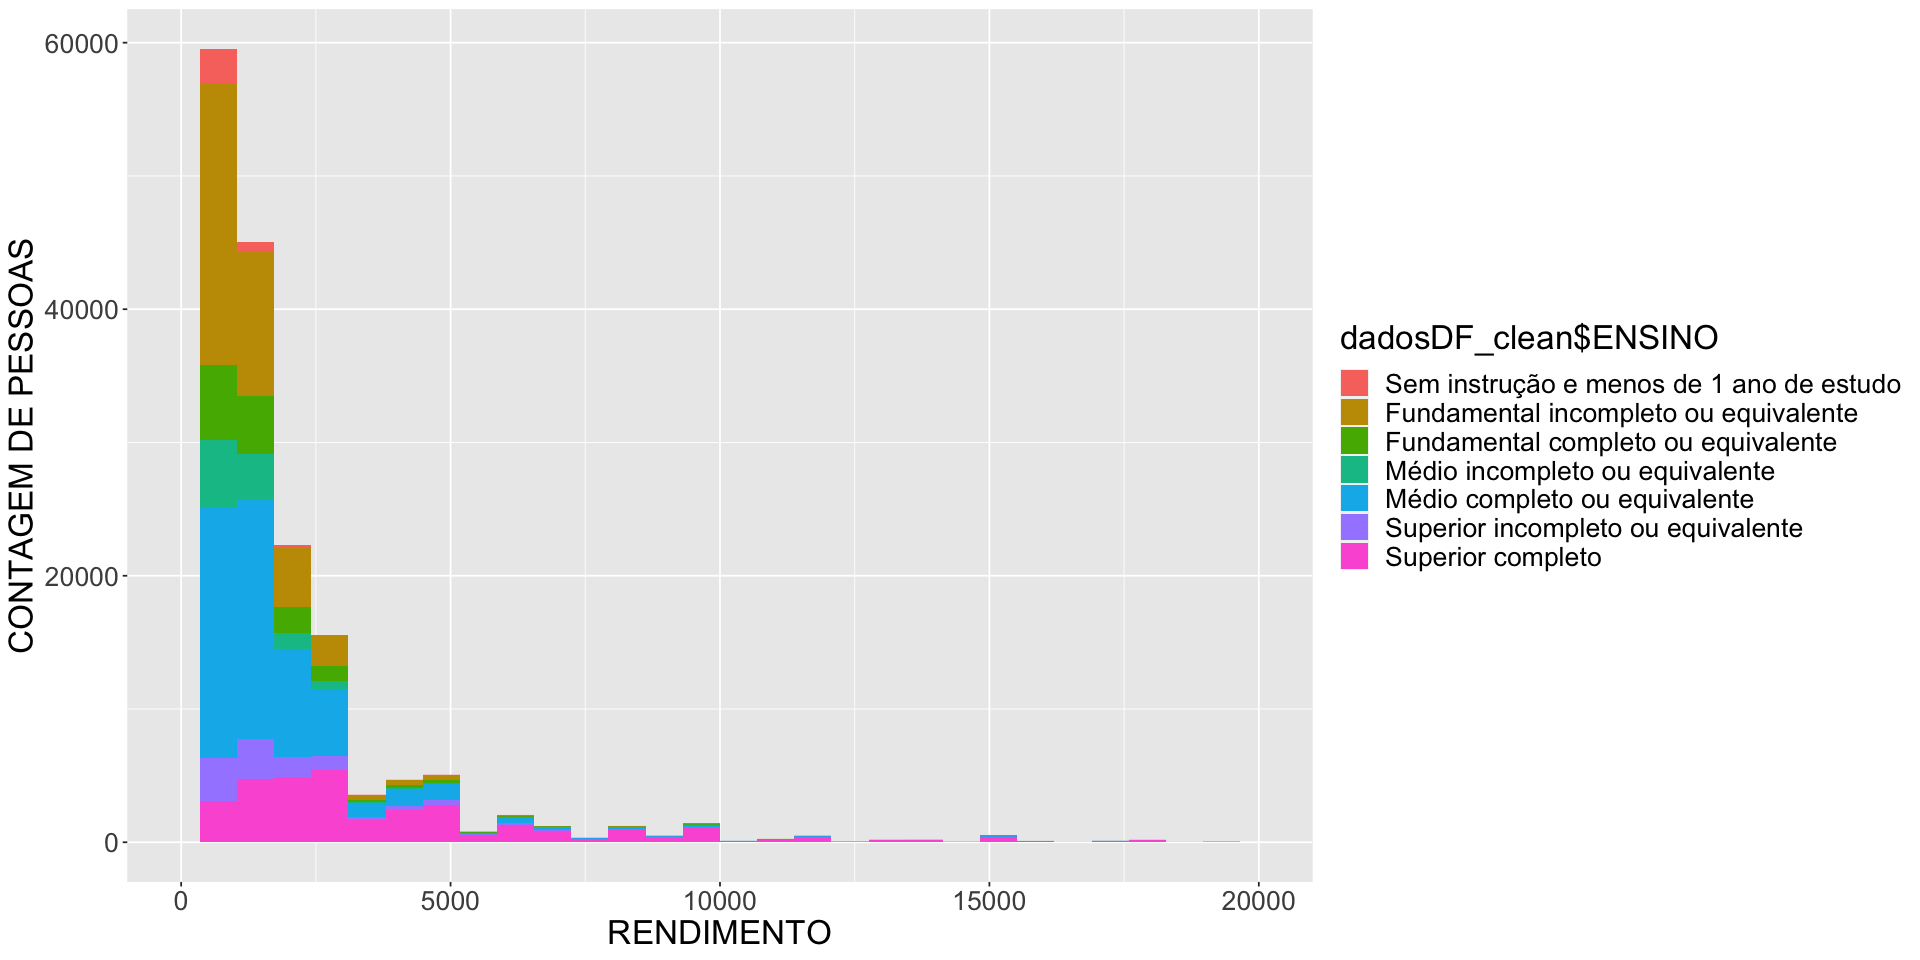

In [59]:
display_html("<h3> Rendimentos por Nivel de Escolaridade</h3>")
hist = ggplot(dadosDF_clean)+aes(RENDIMENTO)+geom_histogram(aes(fill=dadosDF_clean$ENSINO))+xlim(0,20000)+ylab("CONTAGEM DE PESSOAS") + 
theme(text = element_text(size = 20))
suppressWarnings(print(hist))

Rendimentos por Grau de Instrucao e Genero

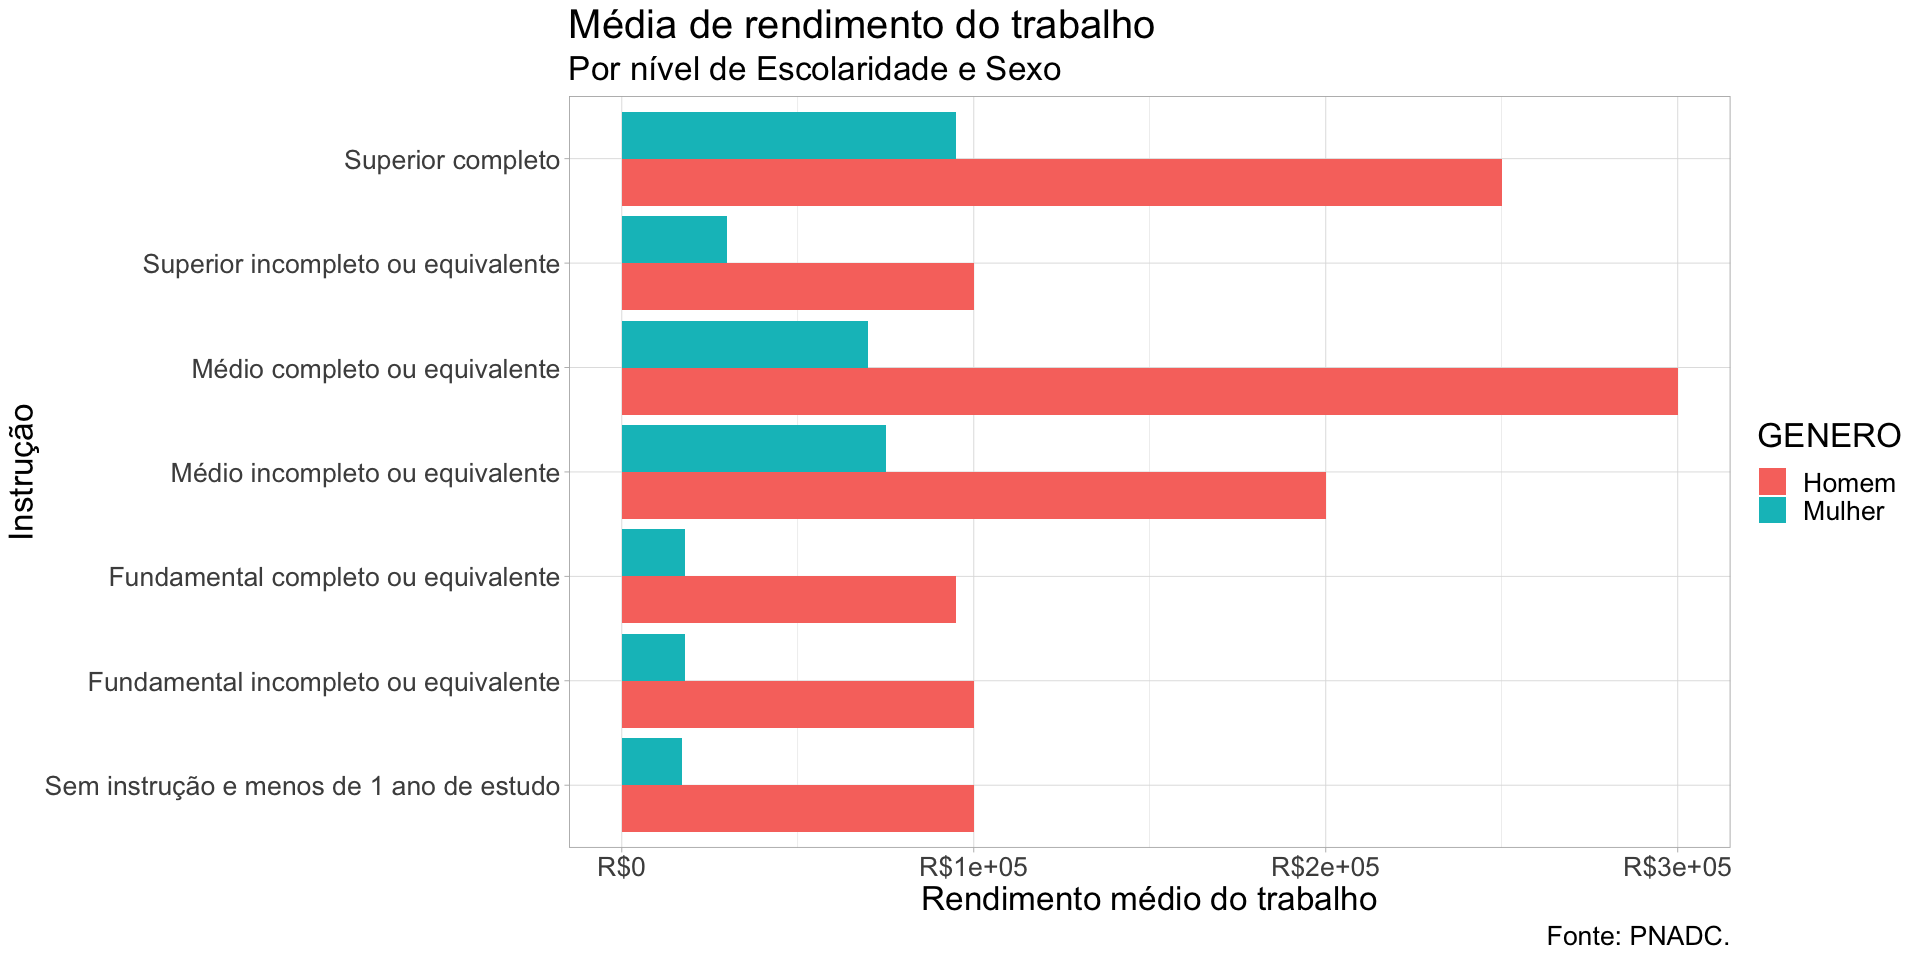

In [60]:

display_html("<h3> Rendimentos por Grau de Instrucao e Genero</h3>")
ggplot(dadosDF_clean, aes(x = ENSINO, y = RENDIMENTO)) +
  geom_col(aes(fill = GENERO), position = "dodge") +
  labs(y = "Rendimento médio do trabalho", x = "Instrução",
       title = "Média de rendimento do trabalho",
       subtitle = "Por nível de Escolaridade e Sexo",
       caption = "Fonte: PNADC.") +
  scale_y_continuous(labels = function(x) paste0("R$", x))+
  coord_flip() +
  theme_light() + theme(text = element_text(size = 20))


PAINEL DE ANALISE - BIBLIOTECA PSYCH

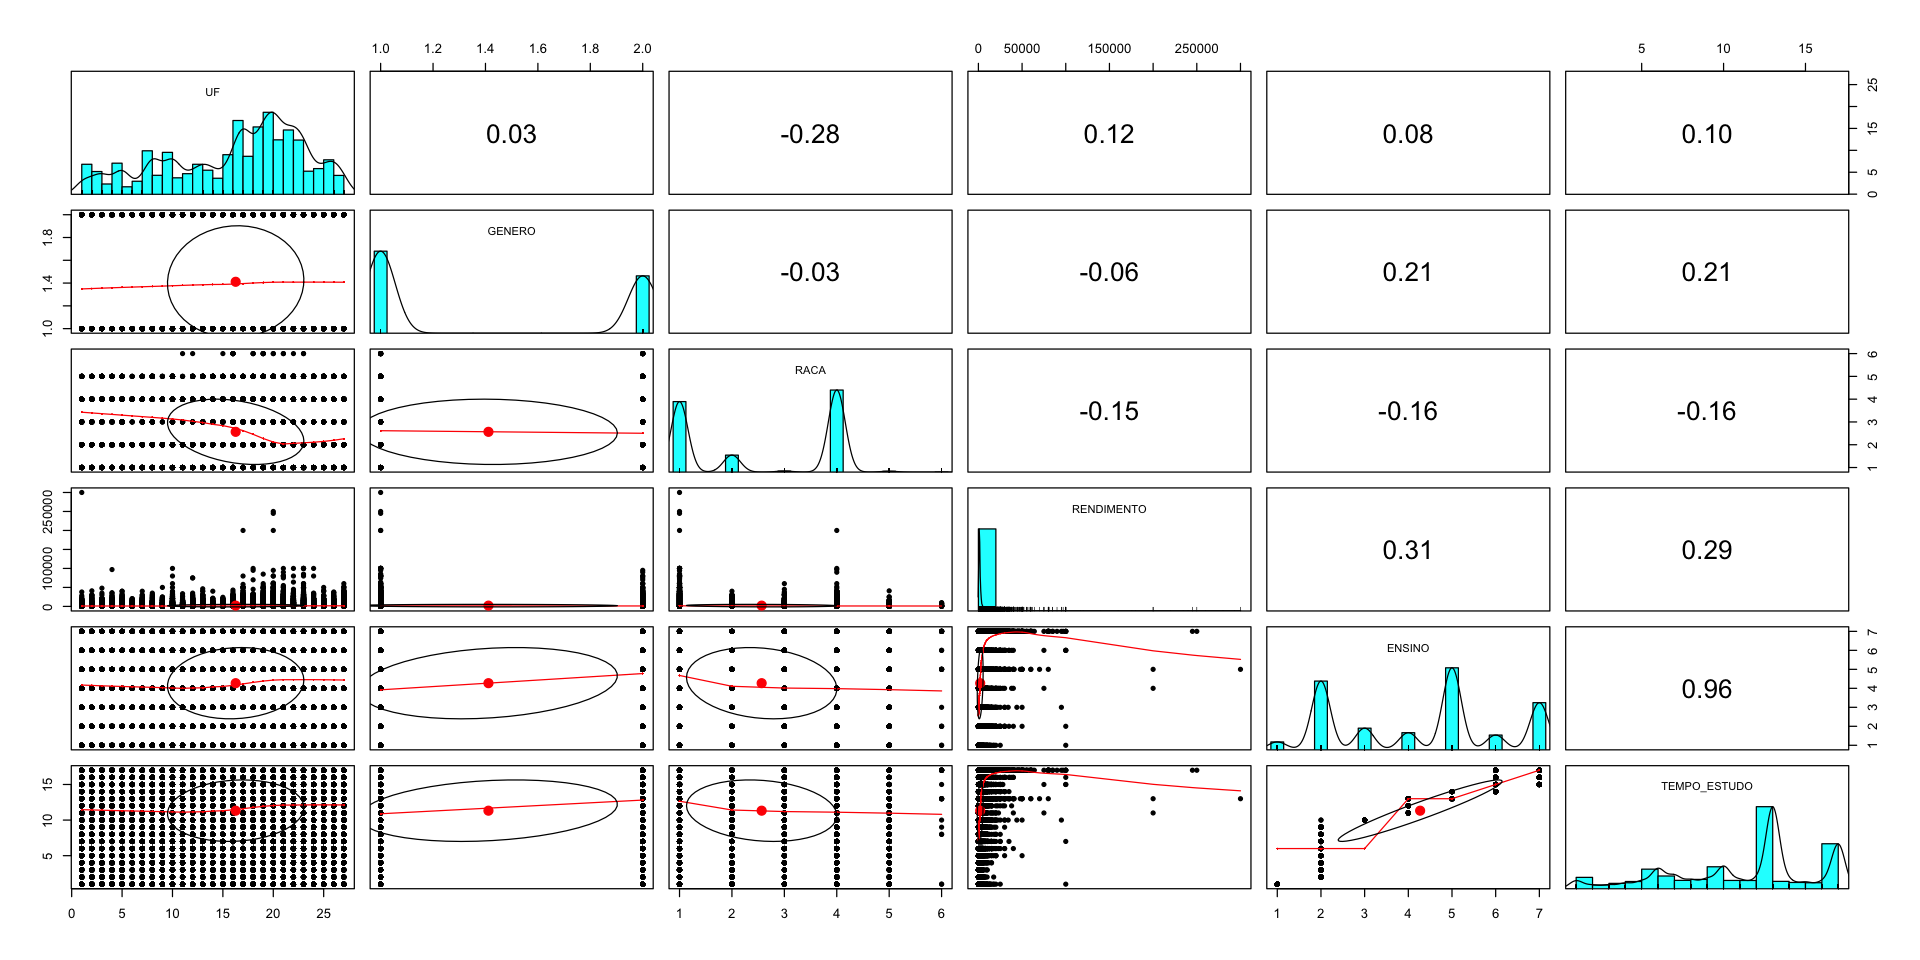

In [61]:
display_html("<h3> PAINEL DE ANALISE - BIBLIOTECA PSYCH </h3>")
points = pairs.panels(dadosDF_clean)

display_html("<h2> <font color=red>TESTE ESTATISTICO ENTRE GRUPOS AMOSTRAIS</h2> <br>
<h3>Nivel Medio e Nivel Superior completos</h3>")

display_html("<h3> H0: means iguais      H1: means diferentes</h3>")

rendimento_superior = dadosDF_clean %>%
select(RENDIMENTO , ENSINO)%>%
filter(ENSINO=="Superior completo")

rendimento_medio = dadosDF_clean %>%
select(RENDIMENTO, ENSINO) %>%
filter(ENSINO == "Médio completo ou equivalente")

In [89]:
z.test(x=rendimento_medio$RENDIMENTO[1:30000], y=rendimento_superior$RENDIMENTO[1:30000], 
       alternative = "two.sided", mu = 0, sigma.x = NA,
  sigma.y = NA, conf.level = 0.95)


	Two-sample z-Test

data:  rendimento_medio$RENDIMENTO[1:30000] and rendimento_superior$RENDIMENTO[1:30000]
z = NA, p-value = NA
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 NA NA
sample estimates:
mean of x mean of y 
 1691.241  4599.229 


In [127]:
display_html("<h3>Resposta: alternative hypothesis: true difference in means is not equal to 0
95 percent</h3>")

Resposta: alternative hypothesis: true difference in means is not equal to 0
95 percent

display_html("<h2>
    <br><br><br><br><BR><BR><font color=red> ANALISE COM CLUSTERING - Algoritmo Kmeans </h2>")

In [104]:
educacao = as.integer(dadosDF_clean$ENSINO)
remuneracao = as.integer(dadosDF_clean$RENDIMENTO)

In [105]:
df_cluster = data_frame(educacao, remuneracao)

In [107]:
str(df_cluster)

tibble [183,075 × 2] (S3: tbl_df/tbl/data.frame)
 $ educacao   : int [1:183075] 2 3 7 7 7 5 7 3 5 5 ...
 $ remuneracao: int [1:183075] 100 700 1600 6000 950 200 3000 1000 998 4000 ...


In [124]:
clustering = kmeans(df_cluster, 3)

Rendimentos Clusterizados em 3 grupos

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



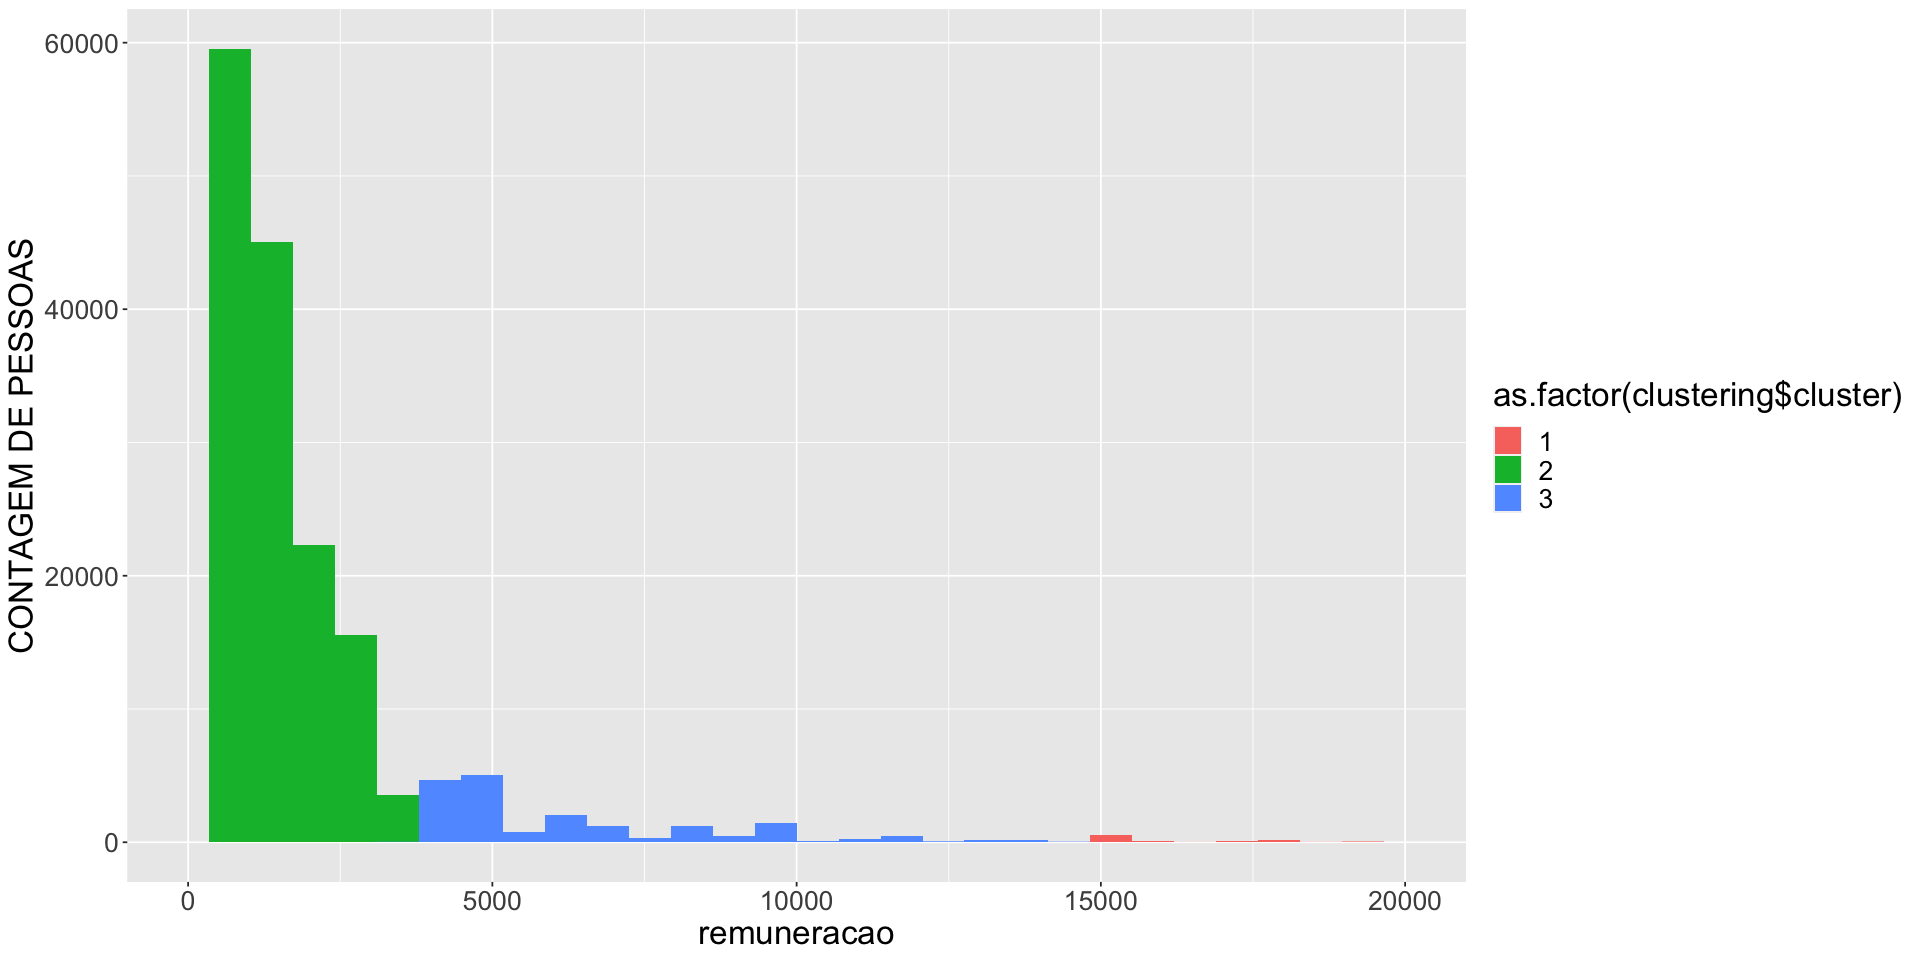

In [125]:
display_html("<h3> Rendimentos Clusterizados em 3 grupos</h3>")
hist = ggplot(df_cluster)+aes(remuneracao)+geom_histogram(aes(fill=as.factor(clustering$cluster)))+xlim(0,20000)+ylab("CONTAGEM DE PESSOAS") + 
theme(text = element_text(size = 20))
suppressWarnings(print(hist))